In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, roc_curve
from sklearn.model_selection import GridSearchCV

In [31]:
# Load the data into a DataFrame
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
print("Dataset shape:", data.shape)
print("Number of fraud cases:", data['Class'].value_counts())

Dataset shape: (284807, 31)
Number of fraud cases: 0    284315
1       492
Name: Class, dtype: int64


In [33]:
# Class column is the target: 0 = Normal, 1 = Fraud
# Check for class imbalance
print("Fraudulent transactions percentage:")
print(data['Class'].value_counts(normalize=True))

Fraudulent transactions percentage:
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [34]:
# Step 4: Define features and target
X = data.drop(columns=['Class'])  # Features (drop target column)
y = data['Class']                 # Target column (1 = fraud, 0 = normal)

In [35]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase iterations for convergence
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.999133925541004


In [38]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[85283    24]
 [   50    86]]


True Negatives: 85295 (normal transactions correctly classified).

False Positives: 4 (normal transactions incorrectly flagged as fraud).

False Negatives: 56 (fraudulent transactions missed).

True Positives: 88 (fraudulent transactions correctly identified).

In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [40]:
def report(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



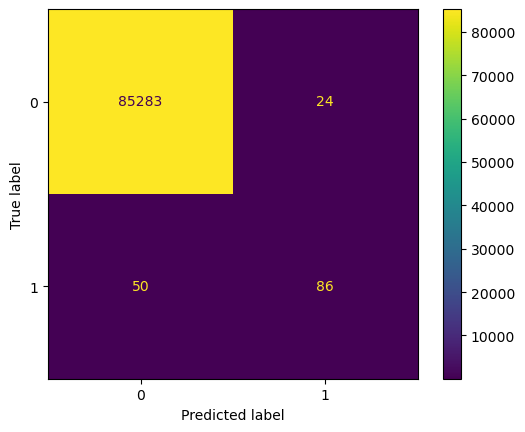

In [41]:
report(y_test, y_pred)

In [19]:
# Optional: Identify predicted fraud cases
fraud_cases = X_test[y_pred == 1]
print("\nPredicted Fraudulent Transactions:")
print(fraud_cases)



Predicted Fraudulent Transactions:
           Time         V1         V2         V3        V4         V5  \
43428   41505.0 -16.526507   8.584972 -18.649853  9.505594 -13.793819   
116404  74262.0  -2.250535   2.365755  -2.955491  0.089791  -2.830745   
238       158.0  -0.159985  -0.611633   2.081419 -1.048128  -1.083456   
77099   56887.0  -0.075483   1.812355  -2.566981  4.127549  -1.628532   
12156   21177.0  -5.905517   6.040280 -11.091637  5.797571  -6.193890   
...         ...        ...        ...        ...       ...        ...   
541       406.0  -2.312227   1.951992  -1.609851  3.997906  -0.522188   
70589   53937.0  -2.042608   1.573578  -2.372652 -0.572676  -2.097353   
119781  75581.0  -2.866364   2.346949  -4.053307  3.983359  -3.463186   
15476   26863.0 -21.209120  12.652197 -23.553933  6.174078 -16.026658   
143333  85285.0  -7.030308   3.421991  -9.525072  5.270891  -4.024630   

              V6         V7         V8        V9  ...       V20       V21  \
43428  -2.

In [27]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization (l1 and l2)
    'solver': ['liblinear', 'saga']         # Solvers that support l1 and l2
}

C: Controls the regularization strength (smaller values mean stronger regularization).

penalty: Regularization type (l1 for Lasso, l2 for Ridge).

solver: Optimization algorithms compatible with penalty (liblinear and saga).

In [28]:
# Step 6: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1, 
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the best model
print("\nBest Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## SMOTE

In [42]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling imbalance

In [43]:
# Step 5: Handle imbalance using SMOTE
print("\nBefore SMOTE: ")
print("Training set class distribution:\n", y_train.value_counts())


Before SMOTE: 
Training set class distribution:
 0    199008
1       356
Name: Class, dtype: int64


In [44]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
print("\nAfter SMOTE: ")
print("Resampled training set class distribution:\n", y_train_resampled.value_counts())


After SMOTE: 
Resampled training set class distribution:
 0    199008
1    199008
Name: Class, dtype: int64


In [46]:
# Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("\nModel Evaluation:")

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9842585115223014


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.09      0.93      0.16       136

    accuracy                           0.98     85443
   macro avg       0.54      0.96      0.58     85443
weighted avg       1.00      0.98      0.99     85443



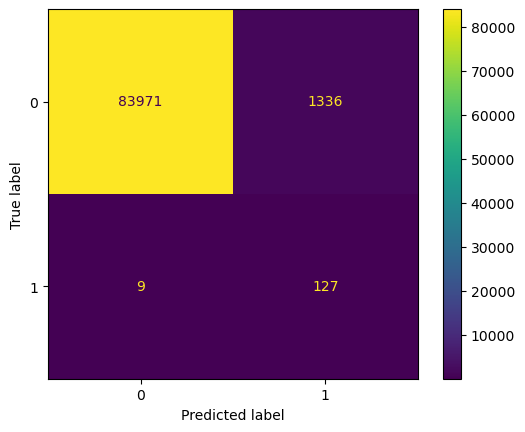

In [48]:
report(y_test, y_pred)




In [49]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.09      0.93      0.16       136

    accuracy                           0.98     85443
   macro avg       0.54      0.96      0.58     85443
weighted avg       1.00      0.98      0.99     85443



FN is decreased and so recall is increased.

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [55]:
# Step 6: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)  
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [56]:
# Step 8: Evaluate the model
print("\nModel Evaluation:")

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9994733330992591

Confusion Matrix:
[[85280    27]
 [   18   118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.87      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### **Key Insights**:
- **Precision** and **Recall** for the fraud class (1) improve significantly after using **SMOTE** and **Random Forest**.  
- The confusion matrix shows that the model detects most fraudulent transactions with fewer **false negatives**.


In [62]:
# Step 5: Get feature importance
importances = rf_model.feature_importances_  # Feature importance scores
feature_names = X.columns  # Feature names

# Combine feature importance and names into a DataFrame for sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


In [64]:
import matplotlib.pyplot as plt

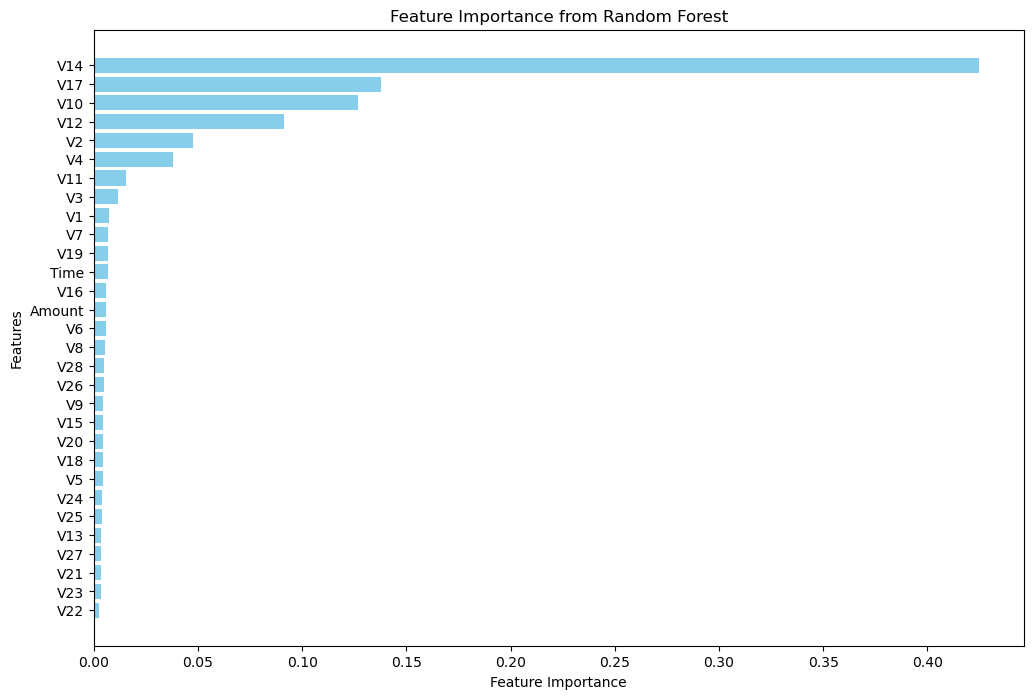

In [65]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()